In this notebook I'm going to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [450]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm

To have a dataset or set of data points, I'll generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [451]:
X = np.linspace(0,20)
a=-1
b=2
Y = a*X+b

#### Ploting data points. 

In [452]:
print('x = ')
print(X)
print('y = ')
print(Y)


x = 
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
y = 
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

# Adagrad

### First, for a single variable linear regression ML model, I'm build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion takes the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion returns the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.

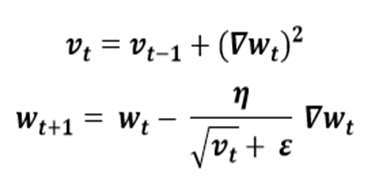

In [453]:
def adagrad(input_data_x, target_labels_y, learning_rate, epsilon ,max_no_of_iterations):
    
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 10**5
    m = len(input_data_x)
    actual_no_of_epochs = 0
    vt0 = 0
    vt1 = 0
    for i in range(max_no_of_iterations):
    

        hypothesis = theta0 + theta1 * input_data_x
        cost = (sum(hypothesis - target_labels_y)**2)/(2*m)
        gradient_0 = (sum(hypothesis - target_labels_y))/m
        gradient_1 = (sum(input_data_x*(hypothesis - target_labels_y)))/m
        vt0 = vt0 + (gradient_0 **2)
        vt1 = vt1 + (gradient_1 **2)
        theta0 = theta0 - (learning_rate/(np.sqrt(vt0) + epsilon)) * gradient_0
        theta1 = theta1 - (learning_rate/(np.sqrt(vt1) + epsilon)) * gradient_1
        gradient_vector = np.array([gradient_0, gradient_1])
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        losses.append(cost)
        

        if norm(gradient_vector) <= 0.001:
            break
        if abs(cost-cost_1) <= 0.0001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs

In [454]:
theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs = adagrad(X, Y, 0.08, 1e-8, 20000)

In [455]:
y_predicted_ADAGRAD = theta0 + theta1 * X

In [456]:
from sklearn.metrics import r2_score
r2_ADAGRAD = r2_score(Y,y_predicted_ADAGRAD)
print(r2_ADAGRAD)

0.9996258929944273


In [457]:
print('no of epochs = ', actual_no_of_epochs)

no of epochs =  3557


# Losses vs Epochs Plot

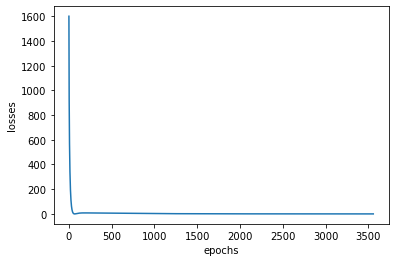

In [458]:
epochs_ = np.arange(0, len(losses))
plt.plot(epochs_, losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

# Losses vs Theta0 Plot

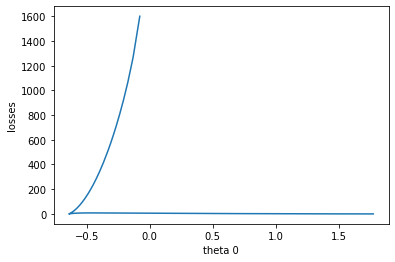

In [459]:
plt.plot(theta0_list, losses)
plt.xlabel("theta 0")
plt.ylabel("losses")
plt.show()

# Losses vs Theta1 Plot

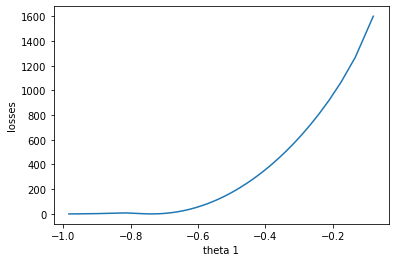

In [460]:
plt.plot(theta1_list, losses)
plt.xlabel("theta 1")
plt.ylabel("losses")
plt.show()

# All Lines until conversion

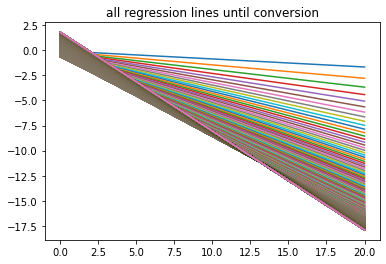

In [461]:
for j in range(len(hypothesis_list)):
    line = hypothesis_list[j]
    plt.plot(X, line)
    
plt.title("all regression lines until conversion")    
plt.show()

# Best fit line

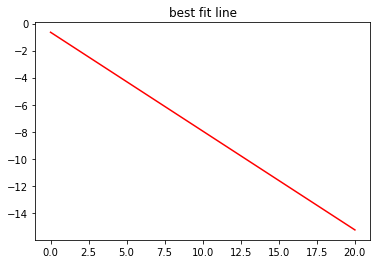

In [462]:
plt.plot(X, y_predicted, c='red')
plt.title('best fit line')
plt.show()

In [463]:
theta0Lst_1, theta1Lst_1, losses_1, hypothesis_1, theta0_1, theta1_1 ,no_of_epochs_1 = adagrad(X, Y, 0.1, 1e-8, 20000)
theta0Lst_2, theta1Lst_2, losses_2, hypothesis_2, theta0_2, theta1_2 ,no_of_epochs_2 = adagrad(X, Y, 0.05, 1e-8, 20000)

In [464]:
y_pred_1 = theta0_1 + theta1_1 * X
r2_1 = r2_score(Y,y_pred_1)
y_pred_2 = theta0_2 + theta1_2 * X
r2_2 = r2_score(Y,y_pred_2)

print("ADAGRAD output for different parameters: ")
print(f"for learning rate = 0.1 number of iterations is {no_of_epochs_1}, and accuracy equals {r2_1}")
print(f"for learning rate = 0.05 number of iterations is {no_of_epochs_2}, and accuracy equals {r2_2}")

ADAGRAD output for different parameters: 
for learning rate = 0.1 number of iterations is 2582, and accuracy equals 0.9997498578077358
for learning rate = 0.05 number of iterations is 433, and accuracy equals 0.9548704561714604


## RMSProp

### Updating the previos implementation to be RMSProp.

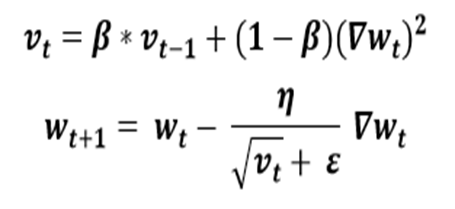

In [465]:
def RMSProp(input_data_x, target_labels_y, learning_rate, epsilon, max_no_of_iterations, Beta):
    
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 10**5
    m = len(input_data_x)
    actual_no_of_epochs = 0
    vt0 = 0
    vt1 = 0
    for i in range(max_no_of_iterations):
    

        hypothesis = theta0 + theta1 * input_data_x
        cost = (sum(hypothesis - target_labels_y)**2)/(2*m)
        gradient_0 = (sum(hypothesis - target_labels_y))/m
        gradient_1 = (sum(input_data_x*(hypothesis - target_labels_y)))/m
        vt0 = (Beta * vt0) + (1-Beta)*(gradient_0 **2)
        vt1 = (Beta * vt1) + (1-Beta)*(gradient_1 **2)
        theta0 = theta0 - (learning_rate/(np.sqrt(vt0) + epsilon)) * gradient_0
        theta1 = theta1 - (learning_rate/(np.sqrt(vt1) + epsilon)) * gradient_1
        gradient_vector = np.array([gradient_0, gradient_1])
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        losses.append(cost)
        

        if norm(gradient_vector) <= 0.00001:
            break
        if abs(cost-cost_1) <= 0.00001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs

In [483]:
theta0_listR, theta1_listR, lossesR, hypothesis_listR, theta0R, theta1R ,actual_no_of_epochsR = RMSProp(X, Y, 0.01, 1e-8, 20000, 0.9)

In [484]:
y_predictedR = theta0R + theta1R * X

In [485]:
r2_RMSProp = r2_score(Y,y_predictedR)
print(r2_RMSProp)

0.9998878088289626


In [486]:
print('no of epochs = ', actual_no_of_epochsR)

no of epochs =  613


# Losses vs Epochs Plot

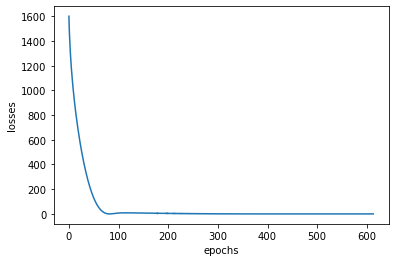

In [487]:
epochsR = np.arange(0, len(lossesR))
plt.plot(epochsR, lossesR)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

# Losses vs Theta0 Plot

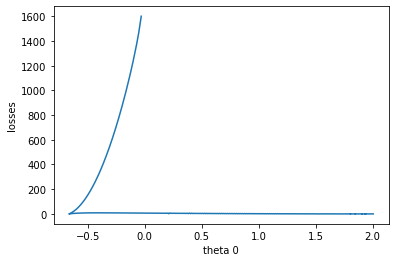

In [488]:
plt.plot(theta0_listR, lossesR)
plt.xlabel("theta 0")
plt.ylabel("losses")
plt.show()

# Losses vs Theta1 Plot

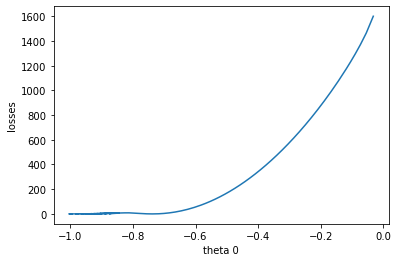

In [489]:
plt.plot(theta1_listR, lossesR)
plt.xlabel("theta 0")
plt.ylabel("losses")
plt.show()

# All lines until conversion

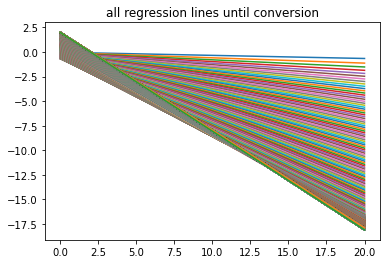

In [490]:
for k in range(len(hypothesis_listR)):
    lineR = hypothesis_listR[k]
    plt.plot(X, lineR)
    
plt.title("all regression lines until conversion")    
plt.show()

# Best Fit Line

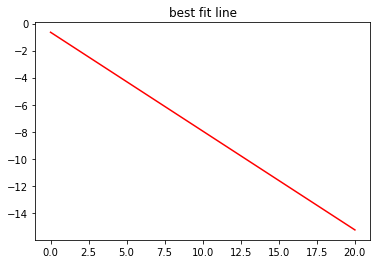

In [494]:
plt.plot(X, y_predicted, c='red')
plt.title('best fit line')
plt.show()

In [499]:
theta0Lst_r1, theta1Lst_r1, losses_r1, hypothesis_r1, theta0_r1, theta1_r1 ,no_of_epochs_r1 = RMSProp(X, Y, 0.001, 1e-8, 20000, 0.9)
theta0Lst_r2, theta1Lst_r2, losses_r2, hypothesis_r2, theta0_r2, theta1_r2 ,no_of_epochs_r2 = RMSProp(X, Y, 0.0001, 1e-8, 20000, 0.9)

In [500]:
y_pred_r1 = theta0_r1 + theta1_r1 * X
r2_r1 = r2_score(Y,y_pred_r1)
y_pred_r2 = theta0_r2 + theta1_r2 * X
r2_r2 = r2_score(Y,y_pred_r2)


print("RMSProp output for different parameters: ")
print(f"for learning rate = 0.001 number of iterations is {no_of_epochs_r1}, and accuracy equals {r2_r1}")
print(f"for learning rate = 0.0001 number of iterations is {no_of_epochs_r2}, and accuracy equals {r2_r2}")

RMSProp output for different parameters: 
for learning rate = 0.001 number of iterations is 3611, and accuracy equals 0.9999988780538821
for learning rate = 0.0001 number of iterations is 7290, and accuracy equals 0.9258922457229042


## Adam

### Updating the previos implementation to be Adam.

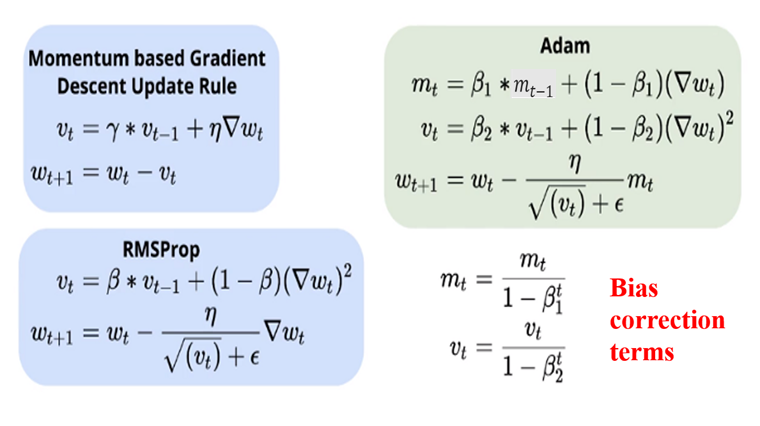

In [501]:
def ADAM(input_data_x, target_labels_y, learning_rate, epsilon, max_no_of_iterations, Beta1, Beta2):
    
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 10**5
    m = len(input_data_x)
    actual_no_of_epochs = 0
    vt0 = 0
    vt1 = 0
    mt0 = 0
    mt1 = 0
    for i in range(1, max_no_of_iterations+1):
    

        hypothesis = theta0 + theta1 * input_data_x
        cost = (sum(hypothesis - target_labels_y)**2)/(2*m)
        gradient_0 = (sum(hypothesis - target_labels_y))/m
        gradient_1 = (sum(input_data_x*(hypothesis - target_labels_y)))/m
        
        mt0 = Beta1 * mt0 + (1-Beta1) * gradient_0
        mt1 = Beta1 * mt1 + (1-Beta1) * gradient_1
        
        vt0 = (Beta2 * vt0) + (1-Beta2)*(gradient_0 **2)
        vt1 = (Beta2 * vt1) + (1-Beta2)*(gradient_1 **2)
        
        #Bias Correction
        mt0 = mt0 / (1 - Beta1**i)
        mt1 = mt1 / (1 - Beta1**i)
        
        vt0 = vt0 / (1 - Beta2**i)
        vt1 = vt1 / (1 - Beta2**i)
        
        theta0 = theta0 - (learning_rate/(np.sqrt(vt0) + epsilon)) * mt0
        theta1 = theta1 - (learning_rate/(np.sqrt(vt1) + epsilon)) * mt1
        gradient_vector = np.array([gradient_0, gradient_1])
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        losses.append(cost)
        

        if norm(gradient_vector) <= 0.0001:
            break
        if abs(cost-cost_1) <= 0.0001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs
            

In [608]:
theta0_listA, theta1_listA, lossesA, hypothesis_listA, theta0A, theta1A ,actual_no_of_epochsA = ADAM(X, Y, 0.005, 1e-8, 20000, 0.9, 0.926)

In [609]:
y_predictedA = theta0A + theta1A * X

In [610]:
r2_ADAM = r2_score(Y,y_predictedA)
print(r2_ADAM)

0.9999589753352054


In [611]:
print(actual_no_of_epochsA)

885


# Losses vs Epochs Plot

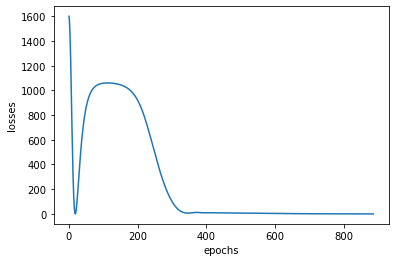

In [612]:
epochsA = np.arange(0, len(lossesA))
plt.plot(epochsA, lossesA)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

# Losses vs Theta0 Plot

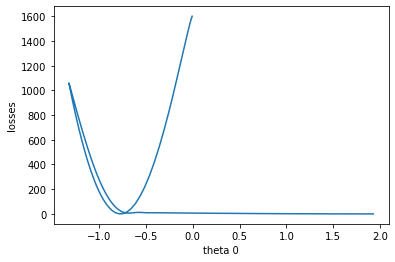

In [621]:
plt.plot(theta0_listA, lossesA)
plt.xlabel("theta 0")
plt.ylabel("losses")
plt.show()

# Losses vs Theta1 Plot

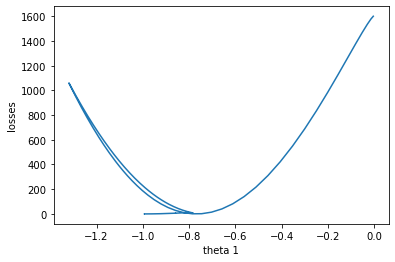

In [622]:
plt.plot(theta1_listA, lossesA)
plt.xlabel("theta 1")
plt.ylabel("losses")
plt.show()

# All Line Until Conversion

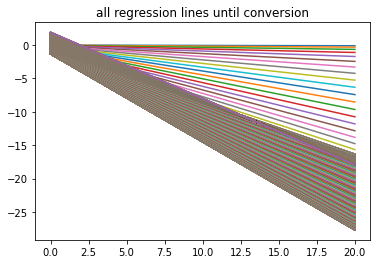

In [623]:
for h in range(len(hypothesis_listA)):
    lineA = hypothesis_listA[h]
    plt.plot(X, lineA)
    
plt.title("all regression lines until conversion")    
plt.show()

# Best Fit Line

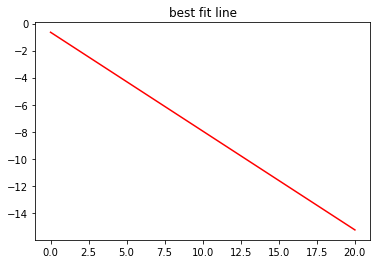

In [624]:
plt.plot(X, y_predicted, c='red')
plt.title('best fit line')
plt.show()

In [625]:
theta0Lst_a1, theta1Lst_a1, losses_a1, hypothesis_a1, theta0_a1, theta1_a1 ,no_of_epochs_a1 = ADAM(X, Y, 0.001, 1e-8, 20000, 0.9, 0.9)
theta0Lst_a2, theta1Lst_a2, losses_a2, hypothesis_a2, theta0_a2, theta1_a2 ,no_of_epochs_a2 = ADAM(X, Y, 0.0001, 1e-8, 20000, 0.9,0.9)

In [626]:
y_pred_a1 = theta0_a1 + theta1_a1 * X
r2_a1 = r2_score(Y,y_pred_a1)
y_pred_a2 = theta0_a2 + theta1_a2 * X
r2_a2 = r2_score(Y,y_pred_a2)


print("ADAM output for different parameters: ")
print(f"for learning rate = 0.001 number of iterations is {no_of_epochs_a1}, and accuracy equals {r2_a1}")
print(f"for learning rate = 0.0001 number of iterations is {no_of_epochs_a2}, and accuracy equals {r2_a2}")

ADAM output for different parameters: 
for learning rate = 0.001 number of iterations is 1673, and accuracy equals 0.9429872411150007
for learning rate = 0.0001 number of iterations is 4991, and accuracy equals 0.9256605115035236


# Comparison between the three algorithms:

In [627]:
theta0Lst_, theta1Lst_, losses_, hypothesis_, theta0_, theta1_ ,no_of_epochs_ = adagrad(X, Y, 0.01, 1e-8, 20000)
theta0Lst_r, theta1Lst_r, losses_r, hypothesis_r, theta0_r, theta1_r ,no_of_epochs_r = RMSProp(X, Y, 0.01, 1e-8, 20000, 0.9)
theta0Lst_a, theta1Lst_a, losses_a, hypothesis_a, theta0_a, theta1_a ,no_of_epochs_a = ADAM(X, Y, 0.01, 1e-8, 20000, 0.9,0.93)

In [628]:
y_pred_adagrad = theta0_ + theta1_ * X
r2_adagrad = r2_score(Y,y_pred_adagrad)

y_pred_RMS = theta0_r + theta1_r * X
r2_RMS = r2_score(Y,y_pred_RMS)

y_pred_ADAM = theta0_a + theta1_a * X
r2_ADAM = r2_score(Y,y_pred_ADAM)

print('for the same learning rate 0.01 and same beta 0.9 the results are :')
print('adagrad: ')
print(f'number of epochs is : {no_of_epochs_} and accuracy :{r2_adagrad}')
print('RMSProp: ')
print(f'number of epochs is : {no_of_epochs_r} and accuracy :{r2_RMS}')
print('ADAM: ')
print(f'number of epochs is : {no_of_epochs_a} and accuracy :{r2_ADAM}')


for the same learning rate 0.01 and same beta 0.9 the results are :
adagrad: 
number of epochs is : 3402 and accuracy :0.9298509255242988
RMSProp: 
number of epochs is : 613 and accuracy :0.9998878088289626
ADAM: 
number of epochs is : 551 and accuracy :0.9944035658443766


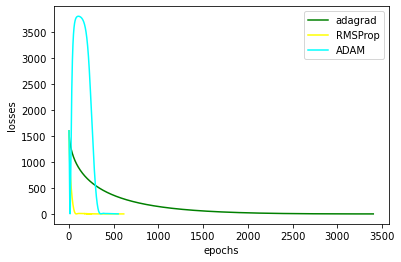

In [629]:
epochs_adagrad = np.arange(0, len(losses_))
epochs_rms = np.arange(0, len(losses_r))
epochs_adam = np.arange(0, len(losses_a))

plt.plot(epochs_adagrad, losses_, c ='green')
plt.plot(epochs_rms, losses_r, c= 'yellow')
plt.plot(epochs_adam, losses_a, c ='cyan')

plt.legend(["adagrad", "RMSProp", "ADAM"])

plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

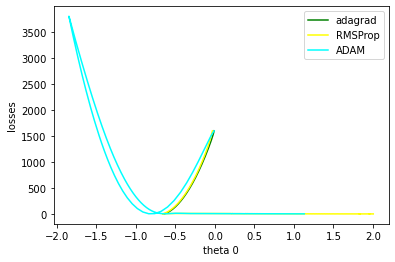

In [630]:
plt.plot(theta0Lst_, losses_, c ='green')
plt.plot(theta0Lst_r, losses_r, c ='yellow')
plt.plot(theta0Lst_a, losses_a, c ='cyan')

plt.legend(["adagrad", "RMSProp", "ADAM"])

plt.xlabel("theta 0")
plt.ylabel("losses")
plt.show()

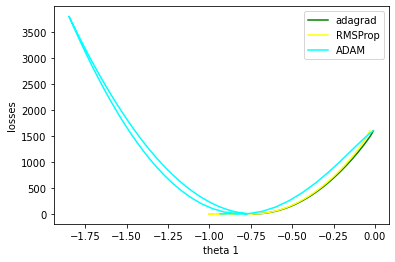

In [631]:
plt.plot(theta1Lst_, losses_, c ='green')
plt.plot(theta1Lst_r, losses_r, c ='yellow')
plt.plot(theta1Lst_a, losses_a, c = 'cyan')

plt.legend(["adagrad", "RMSProp", "ADAM"])

plt.xlabel("theta 1")
plt.ylabel("losses")
plt.show()

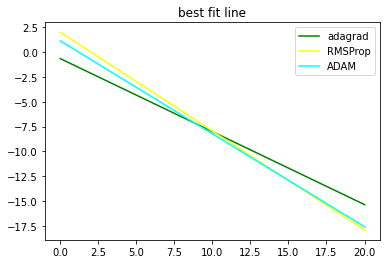

In [632]:
plt.plot(X, y_pred_adagrad, c='green')
plt.plot(X, y_pred_RMS, c='yellow')
plt.plot(X, y_pred_ADAM, c='cyan')
plt.title('best fit line')

plt.legend(["adagrad", "RMSProp", "ADAM"])
plt.show()